## Staten Island, NY OSMNx Biking Network + Simulation
Author: Callie Clark
Last Updated: 5/21/2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import networkx as nx
import osmnx as ox
import json

%matplotlib inline
ox.__version__

from scipy.spatial import cKDTree
from TT_functions import *
import random

In [2]:
year='2023'

In [3]:
G = ox.graph_from_place("Staten Island, New York, USA", network_type="bike") 
G = ox.utils_graph.get_largest_component(G, strongly=True) #Staten Island is not connected to other boroughs with bike/walk

G = ox.add_edge_speeds(G)
G_ = ox.speed.add_edge_travel_times(G, precision=1)

/tmp/ipykernel_42463/1410093053.py:2: FutureWarning: The `get_largest_component` function is deprecated and will be removed in the v2.0.0 release. Replace it with `truncate.largest_component` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.utils_graph.get_largest_component(G, strongly=True) #Staten Island is not connected to other boroughs with bike/walk
/tmp/ipykernel_42463/1410093053.py:5: FutureWarning: The `add_edge_travel_times` function has moved to the `routing` module. Calling `speed.add_edge_travel_times` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_travel_times` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G_ = ox.speed.add_edge_travel_times(G, precision=1)
/home/cusp/crc9978/.conda/envs/ox/lib/python3.12/site-packages/osmnx/speed.py:67: FutureWarning: The `precision` parameter is deprecated and will be removed in the v2.0.0 release. See the 

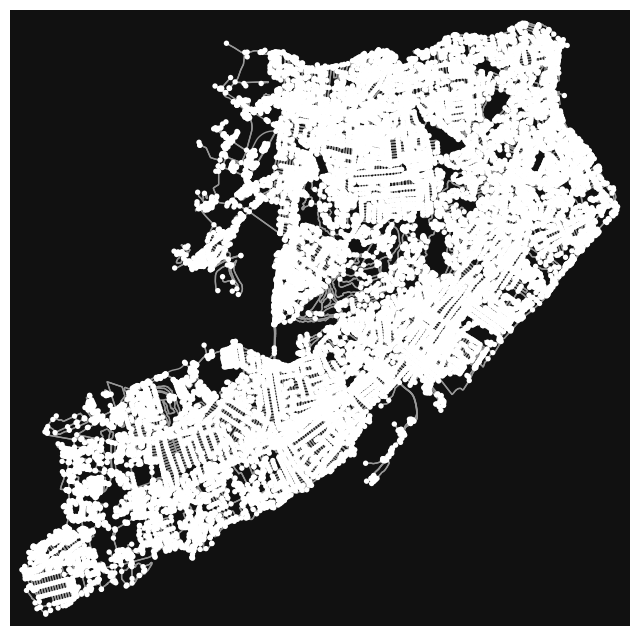

In [4]:
fig, ax = ox.plot_graph(G)


In [5]:
# fig,(ax1)=plt.subplots(ncols=(1),nrows=(1),figsize=(12,12))
# nyc_CT.plot(ax=ax1,alpha=0.3,color='grey',zorder=1,edgecolor='black')
# gdf_nodes[gdf_nodes.index==2317301933].plot(ax=ax1)

In [6]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
gdf_edges

/tmp/ipykernel_42463/232611469.py:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)


osmid                  name      highway  \
u           v           key                                                  
42943494    42975190    0     275273131       Heberton Avenue  residential   
            42967822    0     275273131       Heberton Avenue  residential   
            42943497    0       5710711      Homestead Avenue  residential   
42943497    42997586    0     275273133  Port Richmond Avenue     tertiary   
            42943494    0       5710711      Homestead Avenue  residential   
...                                 ...                   ...          ...   
11910371879 4407796027  0    1283687321                   NaN      service   
11913230853 42960674    0     606538493                   NaN      service   
            409315091   0     606538493                   NaN      service   
            11913230854 0    1284102947                   NaN      service   
11913230854 11913230853 0    1284102947                   NaN      service   

                             oneway reversed   length  speed_kph  travel_time  \
u           v           key                                                     
42943494    42975190    0     False    False   77.274       39.1          7.1   
            42967822    0     False     True   86.158       39.1          7.9   
            42943497    0     False    False  216.507       39.1         19.9   
42943497    42997586    0     False    False   58.111       42.7          4.9   
            42943494    0     False     True  216.507       39.1         19.9   
...                             ...      ...      ...        ...          ...   
11910371879 4407796027  0     False    False   13.880       24.9          2.0   
11913230853 42960674    0     False    False   63.186       24.9          9.1   
            409315091   0     False     True   68.303       24.9          9.9   
            11913230854 0     False    False   12.382       24.9          1.8   
11913230854 11913230853 0     False     True   12.382       24.9          1.8   

                                                                      geometry  \
u           v           key                                                      
42943494    42975190    0    LINESTRING (-74.13628 40.63047, -74.13686 40.6...   
            42967822    0    LINESTRING (-74.13628 40.63047, -74.13562 40.6...   
            42943497    0    LINESTRING (-74.13628 40.63047, -74.13635 40.6...   
42943497    42997586    0    LINESTRING (-74.13837 40.63159, -74.13880 40.6...   
            42943494    0    LINESTRING (-74.13837 40.63159, -74.13829 40.6...   
...                                                                        ...   
11910371879 4407796027  0    LINESTRING (-74.16192 40.60657, -74.16202 40.6...   
11913230853 42960674    0    LINESTRING (-74.07667 40.61443, -74.07679 40.6...   
            409315091   0    LINESTRING (-74.07667 40.61443, -74.07664 40.6...   
            11913230854 0    LINESTRING (-74.07667 40.61443, -74.07664 40.6...   
11913230854 11913230853 0    LINESTRING (-74.07656 40.61450, -74.07664 40.6...   

                            lanes maxspeed bridge access   service junction  \
u           v           key                                                   
42943494    42975190    0     NaN      NaN    NaN    NaN       NaN      NaN   
            42967822    0     NaN      NaN    NaN    NaN       NaN      NaN   
            42943497    0     NaN      NaN    NaN    NaN       NaN      NaN   
42943497    42997586    0     NaN      NaN    NaN    NaN       NaN      NaN   
            42943494    0     NaN      NaN    NaN    NaN       NaN      NaN   
...                           ...      ...    ...    ...       ...      ...   
11910371879 4407796027  0     NaN      NaN    NaN    NaN  driveway      NaN   
11913230853 42960674    0     NaN      NaN    NaN    NaN       NaN      NaN   
            409315091   0     NaN      NaN    NaN    NaN       NaN      NaN   
            11913230854 0    

In [7]:
# pass in a few default speed values (km/hour)
# to fill in edges with missing `maxspeed` from OSM
#bike_speeds = {"residential": 26, "secondary": 20, "tertiary": 24,'cycleway':40,'pedestrian':16,'primary':19,'path':40,'service':26}
bike_speeds = {"residential": 16, "secondary": 16, "tertiary": 16,'cycleway':26,'pedestrian':16,'primary':16,'path':26,'service':16}
# G = ox.add_edge_speeds(G, bike_speeds)
# G = ox.add_edge_travel_times(G)

In [8]:
error_count1=0 
edge_count=0
for edge in G.edges:

    
    edge_obj = G[edge[0]][edge[1]][edge[2]]
    road_type=edge_obj['highway']
    
    distance = edge_obj['length']/1000 # Convert from m to km


    
    edge_count+=1

    try:
        urban_tt = distance/(bike_speeds[road_type] /3600) # Convert from mph to kph, hours to minutes    
    except:

        error_count1+=1
        urban_tt = distance/(16 /3600)# minutes 
        #print(road_type)
    G[edge[0]][edge[1]][edge[2]]['urban_tt'] = round(urban_tt,2)
print(error_count1)

729


In [9]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
gdf_edges

/tmp/ipykernel_42463/232611469.py:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)


osmid                  name      highway  \
u           v           key                                                  
42943494    42975190    0     275273131       Heberton Avenue  residential   
            42967822    0     275273131       Heberton Avenue  residential   
            42943497    0       5710711      Homestead Avenue  residential   
42943497    42997586    0     275273133  Port Richmond Avenue     tertiary   
            42943494    0       5710711      Homestead Avenue  residential   
...                                 ...                   ...          ...   
11910371879 4407796027  0    1283687321                   NaN      service   
11913230853 42960674    0     606538493                   NaN      service   
            409315091   0     606538493                   NaN      service   
            11913230854 0    1284102947                   NaN      service   
11913230854 11913230853 0    1284102947                   NaN      service   

                             oneway reversed   length  speed_kph  travel_time  \
u           v           key                                                     
42943494    42975190    0     False    False   77.274       39.1          7.1   
            42967822    0     False     True   86.158       39.1          7.9   
            42943497    0     False    False  216.507       39.1         19.9   
42943497    42997586    0     False    False   58.111       42.7          4.9   
            42943494    0     False     True  216.507       39.1         19.9   
...                             ...      ...      ...        ...          ...   
11910371879 4407796027  0     False    False   13.880       24.9          2.0   
11913230853 42960674    0     False    False   63.186       24.9          9.1   
            409315091   0     False     True   68.303       24.9          9.9   
            11913230854 0     False    False   12.382       24.9          1.8   
11913230854 11913230853 0     False     True   12.382       24.9          1.8   

                             urban_tt  \
u           v           key             
42943494    42975190    0       17.39   
            42967822    0       19.39   
            42943497    0       48.71   
42943497    42997586    0       13.07   
            42943494    0       48.71   
...                               ...   
11910371879 4407796027  0        3.12   
11913230853 42960674    0       14.22   
            409315091   0       15.37   
            11913230854 0        2.79   
11913230854 11913230853 0        2.79   

                                                                      geometry  \
u           v           key                                                      
42943494    42975190    0    LINESTRING (-74.13628 40.63047, -74.13686 40.6...   
            42967822    0    LINESTRING (-74.13628 40.63047, -74.13562 40.6...   
            42943497    0    LINESTRING (-74.13628 40.63047, -74.13635 40.6...   
42943497    42997586    0    LINESTRING (-74.13837 40.63159, -74.13880 40.6...   
            42943494    0    LINESTRING (-74.13837 40.63159, -74.13829 40.6...   
...                                                                        ...   
11910371879 4407796027  0    LINESTRING (-74.16192 40.60657, -74.16202 40.6...   
11913230853 42960674    0    LINESTRING (-74.07667 40.61443, -74.07679 40.6...   
            409315091   0    LINESTRING (-74.07667 40.61443, -74.07664 40.6...   
            11913230854 0    LINESTRING (-74.07667 40.61443, -74.07664 40.6...   
11913230854 11913230853 0    LINESTRING (-74.07656 40.61450, -74.07664 40.6...   

                            lanes maxspeed bridge access   service junction  \
u           v           key                                                   
42943494    42975190    0     NaN      NaN    NaN    NaN       NaN      NaN   
            42967822    0     NaN      NaN    NaN    NaN       NaN      NaN   
            42943497    0     NaN      NaN    Na

In [10]:
gdf_edges.describe()

,length,speed_kph,travel_time,urban_tt
count,49897.000000,49897.000000,49897.000000,49897.000000
mean,76.030523,34.542965,7.851422,16.714036
std,87.571609,8.021793,9.282732,18.459106
min,0.606000,16.100000,0.100000,0.140000
25%,24.784000,24.900000,2.900000,5.500000
50%,55.555000,39.100000,6.000000,12.330000
75%,90.894000,40.200000,9.600000,20.200000
max,2952.791000,56.300000,426.900000,664.380000


In [11]:
gdf_nodes#.index=11044551598

,y,x,street_count,highway,geometry
osmid,,,,,
42943494,40.630466,-74.136277,3,NaN,POINT (-74.13628 40.63047)
42943497,40.631591,-74.138371,3,traffic_signals,POINT (-74.13837 40.63159)
42943507,40.603984,-74.115377,4,NaN,POINT (-74.11538 40.60398)
42943511,40.603913,-74.117918,4,NaN,POINT (-74.11792 40.60391)
42943514,40.603868,-74.119862,4,NaN,POINT (-74.11986 40.60387)
...,...,...,...,...,...
11887022726,40.628877,-74.168497,3,NaN,POINT (-74.16850 40.62888)
11910371878,40.606664,-74.161938,3,NaN,POINT (-74.16194 40.60666)
11910371879,40.606575,-74.161918,4,NaN,POINT (-74.16192 40.60657)


# Calculate TT

In [12]:
census_tract=pd.read_csv('geo_files/census_tract_centroid.csv',index_col=0)
census_tract=census_tract[(census_tract.BoroName=='Staten Island')]
census_tract['node']=ox.distance.nearest_nodes(G, list(census_tract['lon']), list(census_tract['lat']), return_dist=False)
census_tract.head(n=3)

,GEOID,BoroName,NTA2020,lon,lat,centroid,node
1258,36085000300,Staten Island,SI0101,-74.075277,40.641426,POINT (-74.07527680610576 40.64142615534825),5043820749
1259,36085000600,Staten Island,SI0103,-74.065165,40.615340,POINT (-74.0651643509658 40.615339715448656),5490546068
1260,36085000700,Staten Island,SI0101,-74.082389,40.646090,POINT (-74.08238868230106 40.64609021398698),42955701


In [13]:
census_tract_csv=census_tract[['GEOID','node']]
census_tract_csv.rename(columns={'node':'bike_node'},inplace=True)
census_tract_csv.set_index(keys='GEOID',inplace=True)
# census_tract_csv.to_csv('node_data/CT_nodes_bike_staten.csv')

/tmp/ipykernel_42463/4271874242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_tract_csv.rename(columns={'node':'bike_node'},inplace=True)


In [14]:
fp_df=gpd.read_file('FP_data/food_pantry_schedule_final.geojson',index_col=0)
fp_df=fp_df[(fp_df.BoroName=='Staten Island')]
fp_df['node']=ox.distance.nearest_nodes(G, list(fp_df['lng']), list(fp_df['lat']), return_dist=False)
fp_df.head()

,id,Name,Address,Hours FINAL,Hours FPC,Hours Plentiful,lat,lng,Additional Notes,BoroName,...,Fr_open,Fr_close,Sa_open,Sa_close,Su_open,Su_close,Hours_parsed,hours_open,geometry,node
15,FPC-24,El Centro Del Inmigrante,260 Port Richmond Ave,Tu 03:00PM-07:00PM,Tu 03:00PM-07:00PM,NaT,40.635715,-74.134422,Tuesday's is at 260 Port Richmond Ave.\nThursd...,Staten Island,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,POINT (-74.13442 40.63571),5490118114
28,85366,College of Staten Island Campus Pantry,2800 Victory Blvd,"We,Fr 10:30AM-01:00PM","We,Fr 10:30AM-01:00PM",NaT,40.608736,-74.153432,- The program is open to currently enrolled CS...,Staten Island,...,10.5,13.0,NaN,NaN,NaN,NaN,1.0,5.0,POINT (-74.15343 40.60874),447590310
71,FPC-719,Fort Greene Fresh Pantry - Ingersoll,177 Myrtle Ave,Sa 11:00AM-12:30PM,Sa 11:00AM-12:30PM,NaT,40.629909,-74.117757,"- Serves Downtown Brooklyn, Fort Greene and Cl...",Staten Island,...,NaN,NaN,11.0,12.5,NaN,NaN,1.0,1.5,POINT (-74.11776 40.62991),5490176717
80,85424,Community Health Action of Staten Island - Mob...,2134 Richmond Terrace,"mo,tu,we,Fr 10:00AM-12:30PM\nmo,tu,we,Fr 02:30...","mo,tu,we,Fr 10:00AM-12:30PM\nmo,tu,we,Fr 02:30...",NaT,40.640196,-74.134315,"- See CHASI website, email laura.delprete@chas...",Staten Island,...,10.0,12.5,NaN,NaN,NaN,NaN,1.0,10.0,POINT (-74.13432 40.64020),42950610
97,Plentiful-1345,Staten Island Community Partnership,119 Tompkins Ave,Tu 01:00PM-03:00PM,Tu 01:00PM-03:00PM,NaT,40.621429,-74.077515,- Register through Plentiful. Text SICP to 726...,Staten Island,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,POINT (-74.07752 40.62143),4526248961


In [15]:
fp_df_csv=fp_df[['id','node']]
fp_df_csv.rename(columns={'node':'bike_node'},inplace=True)
fp_df_csv.set_index(keys='id',inplace=True)
fp_node_map=dict(zip(fp_df_csv['bike_node'],fp_df_csv.index))
#fp_df_csv.to_csv('node_data/fp_nodes_bike_staten.csv')


/tmp/ipykernel_42463/1780014429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_df_csv.rename(columns={'node':'bike_node'},inplace=True)


In [16]:
# #combining borough to node dictionaries for all 5 boroughs
# with open('node_data/bike_node_county_map_4b.json') as f:
#     node_county_map_4b = json.load(f)

# # write the dictionary to the file in JSON format
node_county_dict=dict(zip(census_tract['node'],census_tract['BoroName']))
# dict_combined=node_county_map_4b | node_county_dict
# with open('node_data/bike_node_county_map.json', 'w') as f:

#     json.dump(dict_combined, f)

In [17]:
CT_gpd = gpd.GeoDataFrame(
    census_tract, geometry=gpd.points_from_xy(census_tract.lon, census_tract.lat))
CT_gpd.set_crs('4326',inplace=True)

,GEOID,BoroName,NTA2020,lon,lat,centroid,node,geometry
1258,36085000300,Staten Island,SI0101,-74.075277,40.641426,POINT (-74.07527680610576 40.64142615534825),5043820749,POINT (-74.07528 40.64143)
1259,36085000600,Staten Island,SI0103,-74.065165,40.615340,POINT (-74.0651643509658 40.615339715448656),5490546068,POINT (-74.06517 40.61534)
1260,36085000700,Staten Island,SI0101,-74.082389,40.646090,POINT (-74.08238868230106 40.64609021398698),42955701,POINT (-74.08239 40.64609)
1261,36085000800,Staten Island,SI0103,-74.067694,40.611922,POINT (-74.06769338606225 40.611922012515876),5490376862,POINT (-74.06769 40.61192)
1262,36085000900,Staten Island,SI0101,-74.082856,40.642204,POINT (-74.08285642578305 40.64220416387524),42961720,POINT (-74.08286 40.64220)
...,...,...,...,...,...,...,...,...
2272,36085014700,Staten Island,SI0105,-74.116418,40.619264,POINT (-74.1164182706296 40.619263601628035),6051118336,POINT (-74.11642 40.61926)
2307,36085001800,Staten Island,SI9561,-74.058533,40.601518,POINT (-74.05853320685372 40.60151747293364),5490499092,POINT (-74.05853 40.60152)
2310,36085002002,Staten Island,SI0201,-74.070324,40.601478,POINT (-74.07032352061896 40.60147842202535),8268155444,POINT (-74.07032 40.60148)
2317,36085011204,Staten Island,SI9592,-74.097305,40.568732,POINT (-74.09730461298084 40.56873175053539),10157530378,POINT (-74.09730 40.56873)


In [18]:
df_tt_richmond=make_tt_df(G,gdf_nodes,fp_df,CT_gpd,node_county_dict,mode='Bike',k_nearest=10)
df_tt_richmond

,Mo_period_1_nearest,Mo_period_1_tt,Mo_period_1_tt_3,Mo_period_2_nearest,Mo_period_2_tt,Mo_period_2_tt_3,Mo_period_3_nearest,Mo_period_3_tt,Mo_period_3_tt_3,Mo_period_4_nearest,...,Su_period_1_tt_3,Su_period_2_nearest,Su_period_2_tt,Su_period_2_tt_3,Su_period_3_nearest,Su_period_3_tt,Su_period_3_tt_3,Su_period_4_nearest,Su_period_4_tt,Su_period_4_tt_3
5043820749,10688719136,3.59,15.80,10688719136,3.59,5.07,43007603,21.67,24.53,43007603,...,21.67,43018378,6.19,14.62,43018378,6.19,10.10,10295523850,12.05,12.05
5490546068,10688719136,10.04,10.61,10688719136,10.04,10.61,5490280653,10.91,21.55,43007603,...,27.28,43018378,8.13,19.61,10295523850,7.89,7.97,10295523850,7.89,7.89
42955701,10688719136,6.7,15.28,42953532,3.32,5.13,43007603,18.77,25.30,43007603,...,18.77,43018378,9.29,14.16,43018378,9.29,13.20,10295523850,15.16,15.16
5490376862,42993472,9.69,10.23,42993472,9.69,10.23,5490280653,9.71,20.64,43007603,...,26.94,43018378,9.39,20.19,10295523850,6.81,7.67,10295523850,6.81,6.81
42961720,10688719136,4.82,15.10,42964143,3.58,4.43,43007603,20.01,24.13,43007603,...,20.01,43018378,7.42,13.91,43018378,7.42,11.33,10295523850,13.29,13.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051118336,42964317,9.84,10.99,43008038,8.2,9.61,43007603,10.8,14.53,43007603,...,10.80,5490169252,9.81,10.58,42984347,10.79,12.91,43007603,10.8,13.97
5490499092,42993472,6.51,9.77,42993472,6.51,9.77,5490280653,6.72,21.81,43007603,...,31.30,43018378,14.16,24.81,10295523850,13.92,14.00,10295523850,13.92,13.92
8268155444,5490280653,4.39,8.48,5490280653,4.39,8.48,5490280653,4.39,17.94,43007603,...,26.81,43018378,14.49,21.92,10295523850,11.21,12.31,10295523850,11.21,11.21
10157530378,42993472,15.81,17.19,42993472,15.81,17.19,5490280653,16.02,24.11,43007603,...,36.59,43018378,29.93,34.04,10295523850,26.52,27.65,10295523850,26.52,26.52


In [20]:
df_tt_richmond_=census_tract_csv.merge(df_tt_richmond,left_on='bike_node',right_index=True).drop(columns=['bike_node'])
#maps FP nodes to FP IDs
for col in [i for i in df_tt_richmond.columns if 'nearest' in i]:
    df_tt_richmond_[col]=df_tt_richmond_[col].map(fp_node_map)
    
for col in [i for i in df_tt_richmond_.columns if 'tt' in i]:
    df_tt_richmond_[col]=df_tt_richmond_[col].astype('float')
df_tt_richmond_
#df_tt_richmond_.to_csv('travel_time_df/df_tt_bike_richmond_k10.csv')


,Mo_period_1_nearest,Mo_period_1_tt,Mo_period_1_tt_3,Mo_period_2_nearest,Mo_period_2_tt,Mo_period_2_tt_3,Mo_period_3_nearest,Mo_period_3_tt,Mo_period_3_tt_3,Mo_period_4_nearest,...,Su_period_1_tt_3,Su_period_2_nearest,Su_period_2_tt,Su_period_2_tt_3,Su_period_3_nearest,Su_period_3_tt,Su_period_3_tt_3,Su_period_4_nearest,Su_period_4_tt,Su_period_4_tt_3
GEOID,,,,,,,,,,,,,,,,,,,,,
36085000300,85343,3.59,15.80,85343,3.59,5.07,83916,21.67,24.53,83916,...,21.67,85326,6.19,14.62,85326,6.19,10.10,Plentiful-1511,12.05,12.05
36085000600,85343,10.04,10.61,85343,10.04,10.61,84301,10.91,21.55,83916,...,27.28,85326,8.13,19.61,Plentiful-1511,7.89,7.97,Plentiful-1511,7.89,7.89
36085000700,85343,6.70,15.28,FPC-610,3.32,5.13,83916,18.77,25.30,83916,...,18.77,85326,9.29,14.16,85326,9.29,13.20,Plentiful-1511,15.16,15.16
36085000800,FPC-382,9.69,10.23,FPC-382,9.69,10.23,84301,9.71,20.64,83916,...,26.94,85326,9.39,20.19,Plentiful-1511,6.81,7.67,Plentiful-1511,6.81,6.81
36085000900,85343,4.82,15.10,Plentiful-1449,3.58,4.43,83916,20.01,24.13,83916,...,20.01,85326,7.42,13.91,85326,7.42,11.33,Plentiful-1511,13.29,13.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36085014700,81020,9.84,10.99,81260,8.20,9.61,83916,10.80,14.53,83916,...,10.80,FPC-620,9.81,10.58,85454,10.79,12.91,83916,10.80,13.97
36085001800,FPC-382,6.51,9.77,FPC-382,6.51,9.77,84301,6.72,21.81,83916,...,31.30,85326,14.16,24.81,Plentiful-1511,13.92,14.00,Plentiful-1511,13.92,13.92
36085002002,84301,4.39,8.48,84301,4.39,8.48,84301,4.39,17.94,83916,...,26.81,85326,14.49,21.92,Plentiful-1511,11.21,12.31,Plentiful-1511,11.21,11.21


In [20]:
# df_tt=pd.read_csv('tt_df/df_tt_bike.csv',index_col=0)
# df_tt.loc[CT_gpd[~(CT_gpd.NAMELSADCO=='Richmond County')].index.values,:]

In [28]:
# df_tt=make_tt_df(G,gdf_nodes,fp_df,CT_gpd_filtered,k_nearest=5,mode='Bike')
# df_tt.to_csv('tt_df/tt_verification/tt_bike_numstops_raw.csv')
# df_tt

Mo_before_work
urban_tt
Mo_morning
urban_tt
Mo_afternoon
urban_tt
Mo_evening
urban_tt
Tu_before_work
urban_tt
Tu_morning
urban_tt
Tu_afternoon
urban_tt
Tu_evening
urban_tt
We_before_work
urban_tt
We_morning
urban_tt
We_afternoon
urban_tt
We_evening
urban_tt
Th_before_work
urban_tt
Th_morning
urban_tt
Th_afternoon
urban_tt
Th_evening
urban_tt
Fr_before_work
urban_tt
Fr_morning
urban_tt
Fr_afternoon
urban_tt
Fr_evening
urban_tt
Sa_before_work
urban_tt
Sa_morning
urban_tt
Sa_afternoon
urban_tt
Sa_evening
urban_tt
Su_before_work
urban_tt
Su_morning
urban_tt
Su_afternoon
urban_tt
Su_evening
urban_tt


,Mo_before_work_nearest_node,Mo_before_work_tt,Mo_before_work_stops,Mo_morning_nearest_node,Mo_morning_tt,Mo_morning_stops,Mo_afternoon_nearest_node,Mo_afternoon_tt,Mo_afternoon_stops,Mo_evening_nearest_node,...,Su_before_work_stops,Su_morning_nearest_node,Su_morning_tt,Su_morning_stops,Su_afternoon_nearest_node,Su_afternoon_tt,Su_afternoon_stops,Su_evening_nearest_node,Su_evening_tt,Su_evening_stops
42744697,6353650679,42.872,60.0,42740210,4.4075,5.0,42740210,4.4075,5.0,42431039,...,25.0,42730013,11.413667,25.0,42757938,8.188333,17.0,8916499431,79.309667,105.0
42498715,42489168,3.442,7.0,42489168,3.442,7.0,42489168,3.442,7.0,42489168,...,43.0,5488669151,16.1895,34.0,42490047,5.594167,8.0,8916499431,64.551333,63.0
42787712,42807649,9.185333,14.0,9622711187,6.2775,8.0,42826523,4.717667,7.0,8916499431,...,12.0,42809332,8.786667,16.0,42822375,10.816667,11.0,8916499431,21.989833,31.0
42891722,5487737827,20.282,25.0,42806600,10.6685,16.0,42861663,11.958333,14.0,8916499431,...,34.0,42846684,15.7135,11.0,42861663,11.958333,14.0,8916499431,15.604333,18.0
42893183,42887282,1.600167,0.0,42887282,1.600167,0.0,42887282,1.600167,0.0,8916499431,...,61.0,42929365,17.864667,26.0,42929365,17.864667,26.0,8916499431,27.641167,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317301933,42489168,31.443667,41.0,2317301933,0.0,0.0,2317301933,0.0,0.0,42465946,...,62.0,2317301933,0.0,0.0,2317301933,0.0,0.0,8916499431,78.895,83.0
42427477,6353650679,6.785333,20.0,8397237738,3.574833,6.0,8397237738,3.574833,6.0,42439968,...,20.0,6353650679,6.785333,20.0,6353650679,6.785333,20.0,8916499431,55.2135,99.0
8288325003,5487737827,25.862833,43.0,5490106354,7.937667,15.0,5490106354,7.937667,15.0,42509491,...,27.0,5488669151,18.238667,35.0,42494641,16.175833,24.0,8916499431,44.884667,41.0
2317301933,42489168,31.443667,41.0,2317301933,0.0,0.0,2317301933,0.0,0.0,42465946,...,62.0,2317301933,0.0,0.0,2317301933,0.0,0.0,8916499431,78.895,83.0


# Sanity Check

Shape of the dataframe: (5394, 14)
Projection of dataframe: EPSG:4269


/var/folders/dc/rd_rd5f134x0lqqtz2cy_9d80000gn/T/ipykernel_66054/1161226359.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
/Users/callieclark/miniconda3/envs/skmob/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


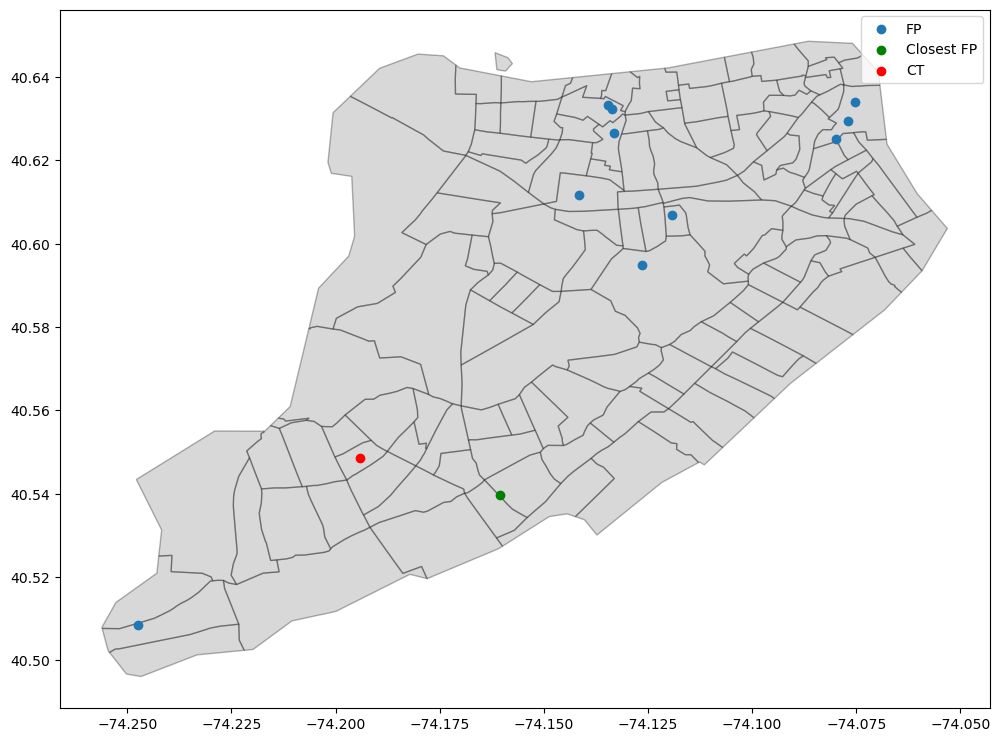

In [40]:
open_fp_dict=get_time_table(fp_df)
time_period='Th_morning'
fp_node=list(open_fp_dict[time_period])
fp_df_open=fp_df.loc[fp_df['node'].isin(fp_node)]

county = gpd.read_file('geo_files/cb_2020_36_tract_500k.shp')
print("Shape of the dataframe: {}".format(county.shape))
print("Projection of dataframe: {}".format(county.crs))

nyc_CT=county[county.NAMELSADCO.isin(['Richmond County'])]
nyc_CT.set_crs(4269,allow_override=True)
nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
nyc_CT.head(n=2)

fig,(ax1)=plt.subplots(ncols=(1),nrows=(1),figsize=(12,12))
nyc_CT.plot(ax=ax1,alpha=0.3,color='grey',zorder=1,edgecolor='black');

fp_df_open.plot(ax=ax1,label='FP')
fp_df[fp_df['node']==42948158].plot(ax=ax1,color='green',label='Closest FP')
CT_gpd[CT_gpd['node']==42976839].plot(ax=ax1,color='red',label='CT')
ax1.legend();

In [ ]:
fig,(ax1)=plt.subplots(ncols=(1),nrows=(1),figsize=(12,12))
nyc_CT.plot(ax=ax1,alpha=0.3,color='grey',zorder=1,edgecolor='black')
node_list=list(CT_gpd[CT_gpd['NAMELSADCO']=='Richmond County'].node.values)
for i in node_list:
    gdf_nodes[gdf_nodes.index==i].plot(ax=ax1)


In [ ]:
#fp_df[['node']].to_networkx()node